This should be runned using the `carla-env`

In [ ]:
import os
import sys
import json
import importlib

import pandas as pd
# Add the "scripts" directory to sys.path
sys.path.append(os.path.abspath("../src"))
from sim import llm_api
from sim import carla_utils

town = 'Town01'  # Use Town01_Opt for a lighter version of Town01

# Generating routines

In [36]:
# The spawn points csv contains the interest points of the map, defined manually
# They are used to generate routes and spawn vehicles
sps = carla_utils.get_spawn_points_from_csv(f'../src/sumo_map/{town}/interest_points.csv')
places = list(sps.keys())
print(f'Possible places: {places}')

Possible places: ['home', 'school', 'restaurant', 'cafe', 'work', 'gym', 'theater', 'university', 'bar']


In [ ]:
n_of_routines = 10
routines_folder = f'../src/sim/llm_routines/{town}'
llm_api.generate_routines(places, n_of_routines, routines_folder=routines_folder, short=True)

{
   "7": {"location": "home", "activity": "wake up"},
   "8": {"location": "school", "activity": "attend classes"},
   "9": {"location": "cafe", "activity": "breakfast"},
   "10": {"location": "university", "activity": "study"},
   "11": {"location": "gym", "activity": "workout"},
   "12": {"location": "work", "activity": "work"},
   "13": {"location": "restaurant", "activity": "lunch"},
   "14": {"location": "theater", "activity": "take a break"},
   "15": {"location": "bar", "activity": "relax"},
   "16": {"location": "home", "activity": "dinner"},
   "17": {"location": "school", "activity": "study"},
   "18": {"location": "home", "activity": "relax"}
}
{
   "7": {"location": "home", "activity": "wake up"},
   "8": {"location": "school", "activity": "study"},
   "9": {"location": "cafe", "activity": "breakfast"},
   "10": {"location": "gym", "activity": "workout"},
   "11": {"location": "work", "activity": "job"},
   "12": {"location": "theater", "activity": "show"},
   "13": {"loca

# Generating Parameters

Now we generate 10 sets of parameters for normal and aggressive driving

If you are generating new parameters, make sure they make sense before running the simulations

In [ ]:
if os.path.exists("../configs/carla_llm.json"):
    print("Carla LLM parameters already generated.")

else:
    styles = ["normal", "aggressive"] # Description of the styles of the vehicles that are going to be generated
    data = pd.read_csv('../src/sim/carlaDriverBehParameters.csv')
    params = llm_api.csv_str(data) # Turns the csv file into a string that can be passed to the LLM

    param_dict_llm = llm_api.get_range_parameters(data, params, styles) # Generates the parameters for the vehicles
    vehdists = carla_utils.generate_vehicle_types(param_dict_llm, styles, n=10)  # Generates the vehicle types for the vehicles

    # Write the parameter dictionary to a file
    with open("../configs/carla_llm.json", "w") as f:
        json.dump(vehdists, f, indent=2)

    with open("../configs/carla_dists_llm.json", "w") as f:
        json.dump(param_dict_llm, f, indent=2)

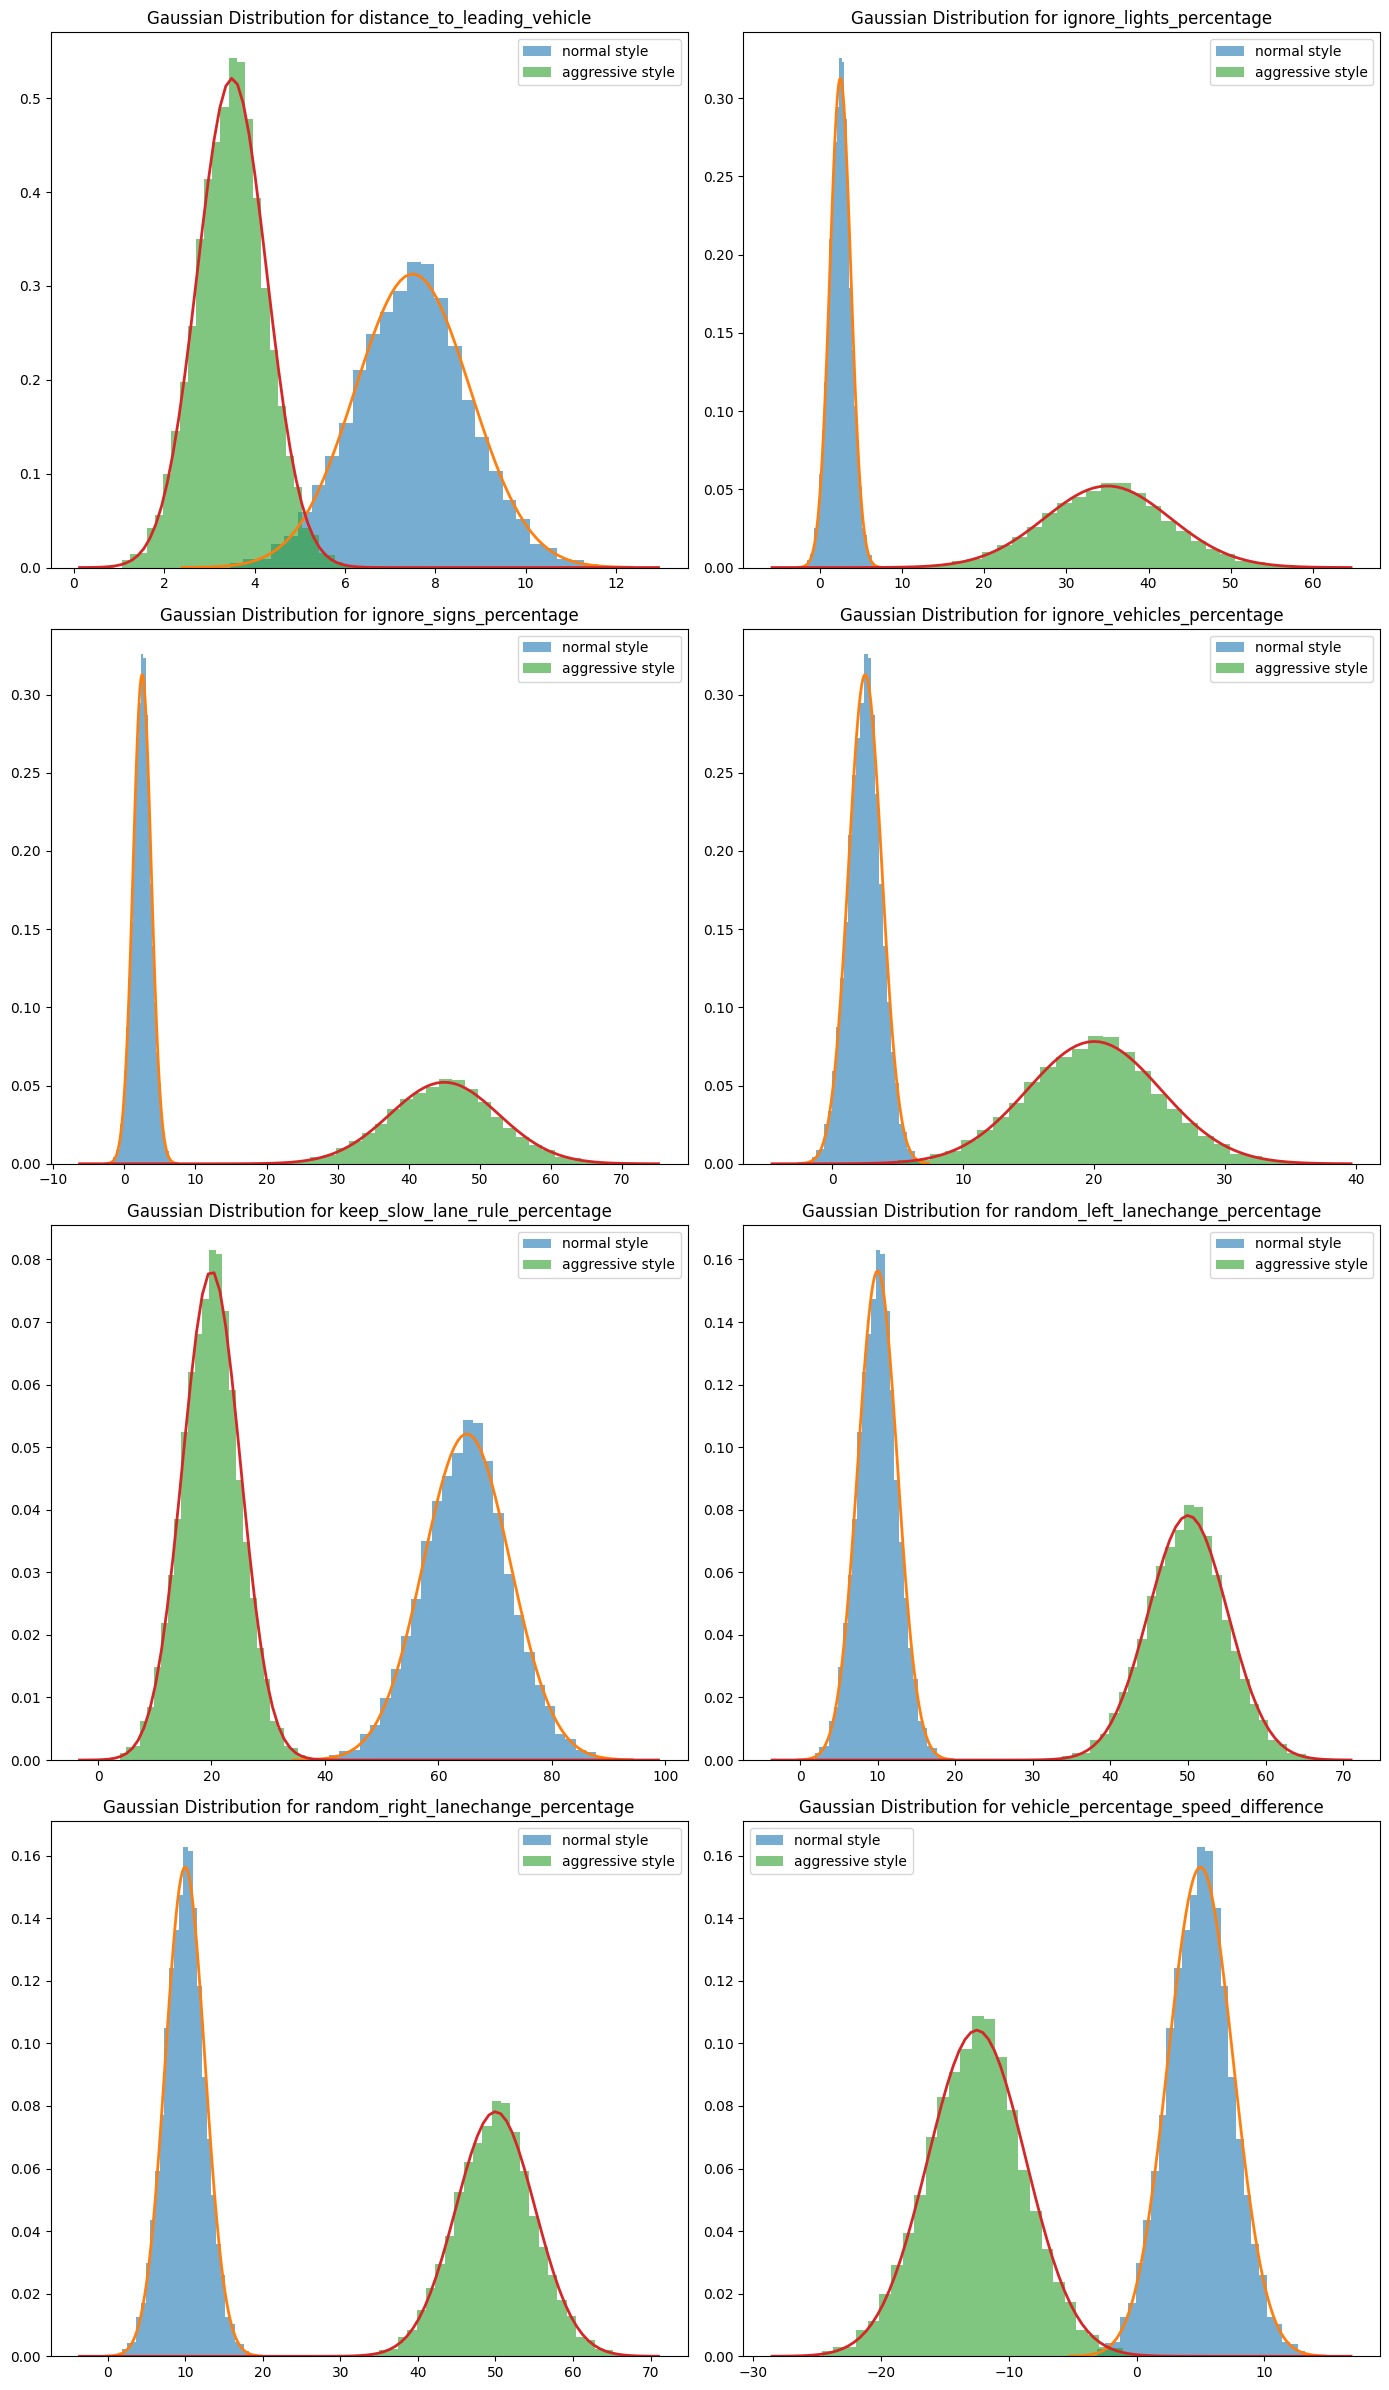

In [ ]:
llm_api.show_gaussians(param_dict_llm, [data['Parameter'][i] for i in range(len(data['Parameter']))], styles)